<a href="https://colab.research.google.com/github/Jekyz-zzz/ML_MuhammadZahyRiza/blob/main/ML_MuhammadZahyRiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset (Capital Bikeshare, 2011-2012)
- **Nama:** Muhammad Zahy Riza

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penggunaan sepeda berdasarkan jam dalam satu hari?
- Pertanyaan 2 : Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

In [2]:
url = "https://raw.githubusercontent.com/Jekyz-zzz/ML_MuhammadZahyRiza/main/hour.csv"
hour_df = pd.read_csv(url)

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset `hour.csv` berisi data peminjaman sepeda dengan granularitas waktu per jam.
- Dataset ini dipilih karena memberikan informasi waktu yang lebih detail untuk menganalisis pola penggunaan sepeda.

### Assessing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
hour_df.duplicated().sum()

np.int64(0)

**Insight:**
- Tidak ditemukan missing value pada seluruh kolom dataset.
- Tidak terdapat data duplikat sehingga setiap baris merepresentasikan observasi yang unik.

### Cleaning Data

In [7]:
hour_df = hour_df.drop(columns=['instant'])

In [8]:
hour_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Insight:**
- Kolom `instant` dihapus karena hanya berfungsi sebagai indeks dan tidak memiliki relevansi analitis.
- Tidak dilakukan imputasi atau penghapusan baris karena data sudah bersih.

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
hour_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


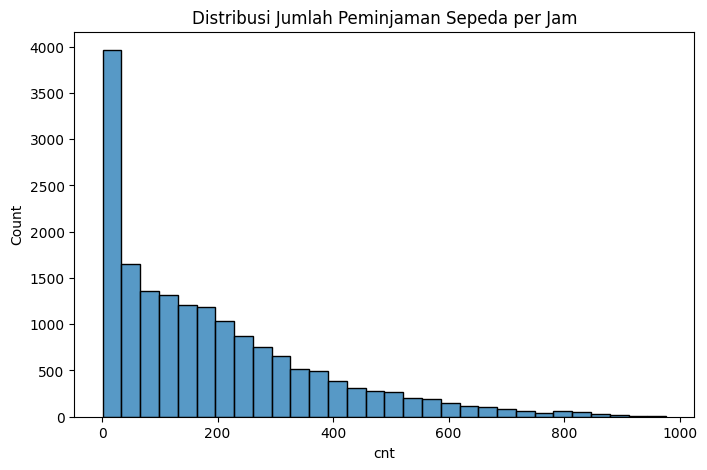

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(hour_df['cnt'], bins=30)
plt.title("Distribusi Jumlah Peminjaman Sepeda per Jam")
plt.show()

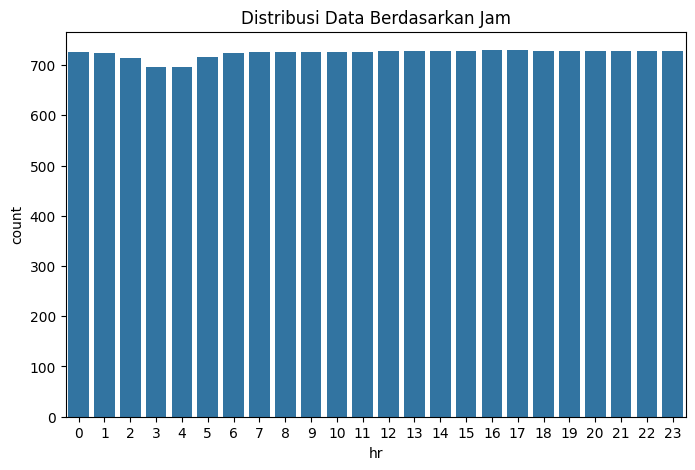

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='hr', data=hour_df)
plt.title("Distribusi Data Berdasarkan Jam")
plt.show()

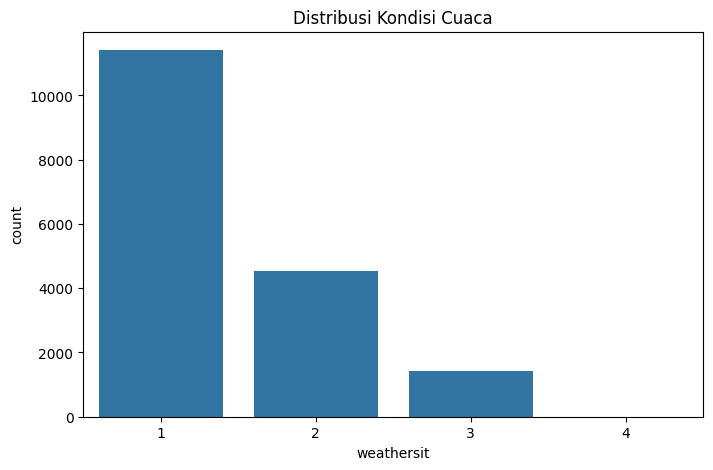

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='weathersit', data=hour_df)
plt.title("Distribusi Kondisi Cuaca")
plt.show()

**Insight:**
- Statistik deskriptif menunjukkan bahwa jumlah peminjaman sepeda per jam (`cnt`) memiliki variasi yang cukup besar, dengan nilai maksimum yang jauh lebih tinggi dibandingkan nilai rata-ratanya, mengindikasikan adanya jam-jam tertentu dengan lonjakan permintaan yang signifikan.
- Distribusi data menunjukkan bahwa sebagian besar observasi memiliki jumlah peminjaman sepeda yang relatif rendah dengan beberapa nilai ekstrem, data tercatat secara merata pada setiap jam, serta kondisi cuaca cerah dan berawan ringan mendominasi dataset.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola Penggunaan Sepeda Berdasarkan Jam

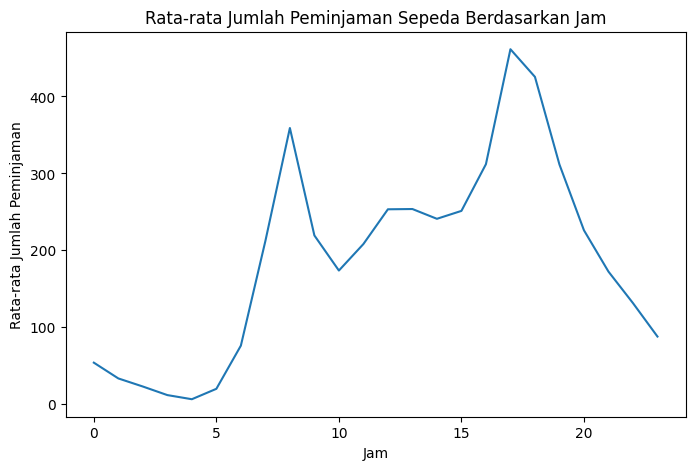

In [13]:
hourly_avg = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title("Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.show()

Rata-rata jumlah peminjaman sepeda menunjukkan dua puncak utama pada jam pagi dan sore hari, yang mengindikasikan bahwa sepeda banyak digunakan untuk aktivitas komuter seperti berangkat dan pulang kerja.

### Pertanyaan 2: Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman

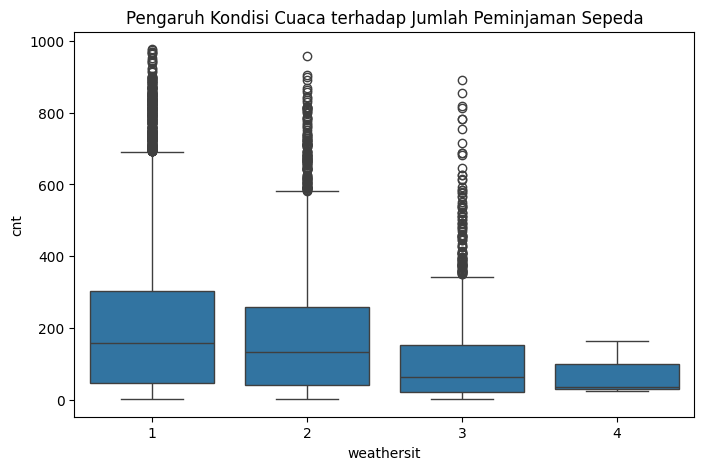

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.show()

Jumlah peminjaman sepeda cenderung lebih tinggi pada kondisi cuaca cerah dan menurun seiring memburuknya kondisi cuaca, yang menunjukkan bahwa faktor cuaca berpengaruh terhadap keputusan pengguna dalam meminjam sepeda.

**Insight:**
- Penggunaan sepeda menunjukkan pola yang jelas dengan dua puncak utama pada jam sibuk pagi dan sore hari, mengindikasikan dominasi aktivitas komuter.
- Kondisi cuaca memengaruhi jumlah peminjaman sepeda, di mana cuaca cerah mendorong peningkatan penggunaan dibandingkan kondisi cuaca yang lebih buruk.

## Analisis Lanjutan (Opsional,)

In [15]:
features = ['hr', 'temp', 'hum', 'windspeed', 'weathersit']
X = hour_df[features]
y = hour_df['cnt']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
model.score(X_test, y_test)

0.33683460185110026

**Insight:**
- Model regresi linear sederhana menghasilkan nilai R² sekitar 0.34, yang menunjukkan bahwa variabel waktu dan kondisi cuaca mampu menjelaskan sebagian variasi jumlah peminjaman sepeda.
- Hasil ini mendukung temuan dari analisis eksploratif bahwa waktu dan cuaca berpengaruh terhadap penggunaan sepeda, meskipun masih terdapat faktor lain di luar variabel yang digunakan dalam model.

## Conclusion

- Conclution pertanyaan 1 : Pola penggunaan sepeda menunjukkan dua puncak utama pada jam sibuk pagi dan sore hari, yang mengindikasikan bahwa sepeda banyak digunakan sebagai sarana transportasi komuter.
- Conclution pertanyaan 2 : Kondisi cuaca berpengaruh terhadap jumlah peminjaman sepeda, di mana cuaca cerah mendorong peningkatan penggunaan dibandingkan kondisi cuaca yang lebih buruk. Temuan ini juga didukung oleh hasil analisis lanjutan menggunakan model regresi linear sederhana.